# Gaia Python Tutorial: Cluster Analysis
*Author: Deborah Baines*

*This tutorial has taken the Gaia Archive tutorial (located at the Gaia Archive, http://archives.esac.esa.int/gaia -> Help -> Tutorials -> Cluster analysis ) and adapted it to python.
The tutorial uses the Gaia TAP+ (astroquery.gaia) module, http://astroquery.readthedocs.io/en/latest/gaia/gaia.html#module-astroquery.gaia .*

*This tutorial is focused on a possible scientific exploration exercise for a known cluster, the Pleiades (M45), using data from the Gaia Archive.*
 
*First, we import all the required python modules:*

In [3]:
# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia

*Do the following to load and look at the available Gaia table names:*

In [4]:
tables = Gaia.load_tables(only_names=True)
for table in (tables):
    print (table.get_qualified_name())

Retrieving tables...
Parsing tables...
Done.
external.external.apassdr9
external.external.gaiadr2_geometric_distance
external.external.ravedr5_com
external.external.ravedr5_dr5
external.external.ravedr5_gra
external.external.ravedr5_on
external.external.sdssdr13_photoprimary
external.external.skymapperdr1_master
external.external.tmass_xsc
public.public.hipparcos
public.public.hipparcos_newreduction
public.public.hubble_sc
public.public.igsl_source
public.public.igsl_source_catalog_ids
public.public.tycho2
public.public.dual
tap_config.tap_config.coord_sys
tap_schema.tap_schema.columns
tap_schema.tap_schema.key_columns
tap_schema.tap_schema.keys
tap_schema.tap_schema.schemas
tap_schema.tap_schema.tables
gaiadr1.gaiadr1.aux_qso_icrf2_match
gaiadr1.gaiadr1.ext_phot_zero_point
gaiadr1.gaiadr1.allwise_best_neighbour
gaiadr1.gaiadr1.allwise_neighbourhood
gaiadr1.gaiadr1.gsc23_best_neighbour
gaiadr1.gaiadr1.gsc23_neighbourhood
gaiadr1.gaiadr1.ppmxl_best_neighbour
gaiadr1.gaiadr1.ppmxl_neighb

*Next, we retrieve all the available data in the region of interest. *

*To do this we perform an asynchronous query (asynchronous rather than synchronous queries should be performed when retrieving more than 2000 rows) centred on the Pleides (coordinates: 56.75, +24.1167) with a search radius of 2 degrees and save the results to a file.*

*Note: The query to the archive is with ADQL (Astronomical Data Query Language). For a description of ADQL and more examples see the Gaia DR1 ADQL cookbook: https://gaia.ac.uk/data/gaia-data-release-1/adql-cookbook *

Pelican nebula:
RA 20h 50m 48.0s
Declination	+44° 20′ 60.0"

In [13]:
pel_ra = 20.8467
pel_dec = 44.35
error = .1 # 5%

coord = SkyCoord(ra=pel_ra, dec=pel_dec, unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(0.1, u.deg)
height = u.Quantity(0.1, u.deg)

#job = Gaia.query_object_async(coordinate=coord, width=width, height=height)
#r = j.get_results()
#r.pprint()

radius = u.Quantity(.5, u.deg)
#job = Gaia.cone_search_async(coord, radius)
#r1 = j.get_results()
#r1.pprint()


#job = Gaia.launch_job_async("SELECT * \
#FROM gaiadr2.gaia_source \
#WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',20.6,44.4,1))=1 \
#AND abs(pmra_error/pmra)<.03 \
#AND abs(pmdec_error/pmdec)< .03;", dump_to_file=True)
#print (job)

query_string = "SELECT * FROM gaiadr1.gaia_source WHERE CONTAINS(POINT('ICRS',gaiadr1.gaia_source.ra,gaiadr1.gaia_source.dec),CIRCLE('ICRS'," + str(pel_ra) + ","+ str(pel_dec) + ",1))=1 AND abs(pmra_error/pmra) < " + str(error) +" AND abs(pmdec_error/pmdec) < " + str(error) + ";"
print (query_string)

job = Gaia.launch_job_async(query_string)


SELECT * FROM gaiadr1.gaia_source WHERE CONTAINS(POINT('ICRS',gaiadr1.gaia_source.ra,gaiadr1.gaia_source.dec),CIRCLE('ICRS',20.8467,44.35,1))=1 AND abs(pmra_error/pmra) < 0.1 AND abs(pmdec_error/pmdec) < 0.1;
Query finished.


*Inspect the output table and number of rows (around 1e5 results are found):*

In [14]:
r = job.get_results()

*To identify the cluster, create a proper motion plot of proper motion in RA (pmra) versus proper motion in DEC (pmdec) in the range pmra [-60,80] and pmdec [-120,30]:*

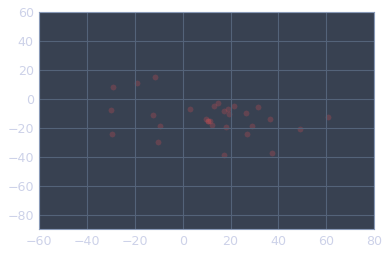

In [15]:
plt.scatter(r['pmra'], r['pmdec'], color='r', alpha=0.3)
plt.xlim(-60,80)
plt.ylim(-90,60)

plt.show()

*Perform another asynchronous query to filter the results by quality:*

In [16]:
job2 = Gaia.launch_job_async("SELECT * \
FROM gaiadr2.gaia_source \
WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',20.8,44.3,1))=1 \
AND abs(pmra_error/pmra)<.03 \
AND abs(pmdec_error/pmdec)< .03;", dump_to_file=True)



#job2 = Gaia.launch_job_async("SELECT * \
#FROM gaiadr2.gaia_source \
#WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',20.6,44,4,1))=1 \
#AND abs(pmra_error/pmra)<.03 \
#AND abs(pmdec_error/pmdec)< .03;", dump_to_file=True)

print (job2)

Jobid: 1568421610163O
Phase: COMPLETED
Owner: None
Output file: async_20190913204010.vot
Results: None


*Again, inspect the output table and number of rows:*

In [17]:
j = job2.get_results()


*Plot these new filtered results on the same plot as the previous search:*

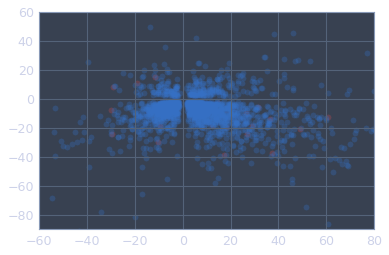

In [18]:
plt.scatter(r['pmra'], r['pmdec'], color='r', alpha=0.3)
plt.scatter(j['pmra'], j['pmdec'], color='b', alpha=0.3)
plt.xlim(-60,80)
plt.ylim(-90,60)

plt.show()

*Now we are going to take the candidate objects to be in the cluster. Based on the proper motion plot, we execute the same job with the following constraints on the proper motions in RA and DEC: pmra between 15 and 25, pmdec between -55 and -40:*

*Again, inspect the output table and number of rows, and call the job 'm45cluster':*

In [11]:
print (j['parallax']) 

      parallax     
        mas        
-------------------
 0.9996180246815445
 1.2489898625892484
  6.060344947602924
 0.6899442544758126
  2.033854551272006
  2.102658108902425
 1.3621324945360427
 1.4451281383863337
  1.551490278467361
0.32889469816225114
                ...
 2.0331030428778654
  1.044835881281879
 1.3855096852030355
  1.115712835236189
 0.3437122995843001
  1.710512390891522
 1.7582188671345125
 3.3150227462243818
 2.5343163385435457
  2.210390709219606
Length = 2522 rows


*Plot these new filtered results on the same plot as the previous search:*

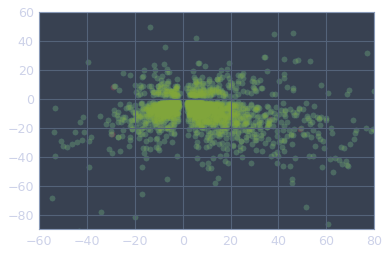

In [12]:
plt.scatter(r['pmra'], r['pmdec'], color='r', alpha=0.3)
plt.scatter(j['pmra'], j['pmdec'], color='b', alpha=0.3)
plt.scatter(j['pmra'], j['pmdec'], color='g', alpha=0.3)
plt.xlim(-60,80)
plt.ylim(-90,60)

plt.show()

*Calculate the average parallax and standard deviation of the parallax for the M45 cluster candidates:*

In [182]:
avg_parallax = np.mean(pelcluster['parallax']) 
stddev_parallax = np.std(pelcluster['parallax']) 
print (avg_parallax, stddev_parallax)

4.9371146668386965 2.605402515406797


*Now, we want to add information from other catalogues, in this example from 2MASS. To do this we make use of the pre-computed cross-matched tables provided in the Gaia archive.*

*We obtain the 2MASS photometric data by using the Gaia - 2MASS cross-matched best neighbour table (gaiadr1.tmass_best_neighbour) to identify the sources and the 2MASS original table (gaiadr1.tmass_original_valid) to retrieve the photometry:*

In [19]:
job4 = Gaia.launch_job_async("SELECT * \
FROM gaiadr1.gaia_source AS g, gaiadr1.tmass_best_neighbour AS tbest, gaiadr1.tmass_original_valid AS tmass \
WHERE g.source_id = tbest.source_id AND tbest.tmass_oid = tmass.tmass_oid \
AND CONTAINS(POINT('ICRS',g.ra,g.dec),CIRCLE('ICRS',20.8467,44,4,1))=1 \
AND abs(g.pmra_error/g.pmra)<0.03 \
AND abs(g.pmdec_error/g.pmdec)<0.03 \
AND g.pmra IS NOT NULL AND abs(g.pmra)>0 \
AND g.pmdec IS NOT NULL AND abs(g.pmdec)>0 \
AND g.pmra BETWEEN 15 AND 25 AND g.pmdec BETWEEN 39 AND 49;", dump_to_file=False)

500


Exception: 500

*Finally, confirm the output table has Gaia and 2MASS photometry and check the number of rows in the table:*

In [ ]:
p = job4.get_results() 
print (p['phot_g_mean_mag', 'j_m', 'h_m', 'ks_m']) 

All of the above has been performed as an anonymous user to the Gaia archive. To log in to the archive, keep and share your results, see the following instructions: http://astroquery.readthedocs.io/en/latest/gaia/gaia.html#authenticated-access

**Additional information**

*The above query to obtain the 2MASS catalogue data can also be performed by using an 'INNER JOIN' in the ADQL query. For example:*

In [ ]:
job5 = Gaia.launch_job_async("SELECT * \
FROM gaiadr2.gaia_source \
INNER JOIN gaiadr2.tmass_best_neighbour ON gaiadr2.gaia_source.source_id = gaiadr2.tmass_best_neighbour.source_id \
INNER JOIN gaiadr2.tmass_original_valid ON gaiadr2.tmass_original_valid.tmass_oid = gaiadr2.tmass_best_neighbour.tmass_oid \
WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',pel_ra,pel_dec,2))=1 \
AND abs(pmra_error/pmra)<0.10 \
AND abs(pmdec_error/pmdec)<0.10 \
AND pmra IS NOT NULL AND abs(pmra)>0 \
AND pmdec IS NOT NULL AND abs(pmdec)>0 \
AND pmra BETWEEN 15 AND 25 \
AND pmdec BETWEEN -55 AND -40;", dump_to_file=False)

*Confirm the output table has Gaia and 2MASS photometry and check the number of rows in the table is the same as above (106 rows):*

In [ ]:
test = job5.get_results() 
print (test['phot_g_mean_mag', 'j_m', 'h_m', 'ks_m']) 

*Visually inspect the results are the same by plotting the same as above:* 

In [ ]:
plt.scatter(r['pmra'], r['pmdec'], color='r', alpha=0.3)
plt.scatter(j['pmra'], j['pmdec'], color='b', alpha=0.3)
plt.scatter(m45cluster['pmra'], m45cluster['pmdec'], color='g', alpha=0.3)
plt.scatter(test['pmra'], test['pmdec'], color='y', alpha=0.3)
plt.xlim(-60,80)
plt.ylim(-120,30)

plt.show()